In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import plot_roc_curve,roc_auc_score,roc_curve

In [2]:
rainfall=pd.read_csv("weatherAUS.csv")

In [3]:
rainfall.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [4]:
rainfall.tail(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8415,2017-06-16,Uluru,5.2,24.3,0.0,NaN,NaN,E,24.0,SE,...,53.0,24.0,1023.8,1020.0,NaN,NaN,12.3,23.3,No,No
8416,2017-06-17,Uluru,6.4,23.4,0.0,NaN,NaN,ESE,31.0,S,...,53.0,25.0,1025.8,1023.0,NaN,NaN,11.2,23.1,No,No
8417,2017-06-18,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,No
8418,2017-06-19,Uluru,7.4,20.6,0.0,NaN,NaN,E,35.0,ESE,...,63.0,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,No,No
8419,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [5]:
rainfall.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4880,2010-09-30,Melbourne,5.8,15.6,0.0,2.4,6.2,WSW,30.0,W,...,56.0,44.0,1026.4,1024.1,7.0,7.0,11.1,14.7,No,No
7855,2013-09-05,PerthAirport,8.5,20.3,0.0,3.4,9.0,SSW,35.0,N,...,59.0,43.0,1027.2,1024.4,5.0,3.0,15.9,18.6,No,No
5365,2009-11-08,Melbourne,19.4,34.2,0.0,12.0,13.2,N,54.0,N,...,37.0,21.0,1027.6,1024.6,0.0,2.0,25.9,33.1,No,No
3005,2016-04-20,Williamtown,14.2,24.3,0.0,2.4,7.9,SSE,28.0,NW,...,96.0,70.0,1024.4,1021.8,7.0,2.0,18.3,23.1,No,No
2711,2015-05-26,Penrith,4.4,17.6,0.2,NaN,NaN,N,13.0,N,...,98.0,58.0,NaN,NaN,NaN,NaN,8.3,17.1,No,No


In [6]:
rainfall.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
rainfall.shape

(8425, 23)

In [8]:
rainfall.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [10]:
rainfall.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [11]:
rainfall=pd.DataFrame(data=rainfall)

In [12]:
rainfall

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [13]:
rainfall.isnull()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
8421,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
8422,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
8423,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
rainfall.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [15]:
rainfall.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [16]:
rainfall.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.720955,0.091642,0.348643,0.081365,0.241317,0.137263,0.180091,-0.130906,0.079569,-0.465478,-0.458665,0.111213,0.046889,0.888342,0.689652
MaxTemp,0.720955,1.000000,-0.088906,0.424728,0.523909,0.146113,0.013425,0.088797,-0.392496,-0.424217,-0.347285,-0.430074,-0.307700,-0.301675,0.869503,0.978665
Rainfall,0.091642,-0.088906,1.000000,0.043463,-0.209654,0.104999,0.051349,0.025185,0.231702,0.238730,-0.080412,-0.037270,0.195157,0.159250,-0.007191,-0.092263
Evaporation,0.348643,0.424728,0.043463,1.000000,0.340893,0.214069,0.176701,0.142421,-0.286869,-0.221244,-0.218171,-0.233401,-0.084288,-0.152637,0.405467,0.414156
Sunshine,0.081365,0.523909,-0.209654,0.340893,1.000000,-0.018455,-0.025112,0.045031,-0.512349,-0.630536,0.028666,-0.047098,-0.705577,-0.723957,0.348708,0.546057
WindGustSpeed,0.241317,0.146113,0.104999,0.214069,-0.018455,1.000000,0.656079,0.711403,-0.286045,-0.097380,-0.430736,-0.394745,0.030124,0.104157,0.211477,0.106872
WindSpeed9am,0.137263,0.013425,0.051349,0.176701,-0.025112,0.656079,1.000000,0.566322,-0.358981,-0.111595,-0.197189,-0.156517,-0.000607,0.068930,0.109936,-0.002619
WindSpeed3pm,0.180091,0.088797,0.025185,0.142421,0.045031,0.711403,0.566322,1.000000,-0.252488,-0.091248,-0.291271,-0.240378,0.005807,0.003894,0.185329,0.066201
Humidity9am,-0.130906,-0.392496,0.231702,-0.286869,-0.512349,-0.286045,-0.358981,-0.252488,1.000000,0.636255,0.154699,0.188463,0.472126,0.352736,-0.378389,-0.383788
Humidity3pm,0.079569,-0.424217,0.238730,-0.221244,-0.630536,-0.097380,-0.111595,-0.091248,0.636255,1.000000,0.001763,0.076002,0.509797,0.520221,-0.130973,-0.491634


In [17]:
rainfall = rainfall.drop(rainfall[rainfall['RainTomorrow'].isnull()].index)

In [18]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8186 entries, 0 to 8423
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8186 non-null   object 
 1   Location       8186 non-null   object 
 2   MinTemp        8126 non-null   float64
 3   MaxTemp        8151 non-null   float64
 4   Rainfall       8079 non-null   float64
 5   Evaporation    4767 non-null   float64
 6   Sunshine       4306 non-null   float64
 7   WindGustDir    7233 non-null   object 
 8   WindGustSpeed  7233 non-null   float64
 9   WindDir9am     7377 non-null   object 
 10  WindDir3pm     7900 non-null   object 
 11  WindSpeed9am   8124 non-null   float64
 12  WindSpeed3pm   8100 non-null   float64
 13  Humidity9am    8142 non-null   float64
 14  Humidity3pm    8103 non-null   float64
 15  Pressure9am    6894 non-null   float64
 16  Pressure3pm    6893 non-null   float64
 17  Cloud9am       5895 non-null   float64
 18  Cloud3pm

In [19]:
rainfall_object = rainfall.select_dtypes(include='object')
rainfall_float = rainfall.select_dtypes(exclude='object')
rainfall_float.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [20]:
obj_rate = pd.DataFrame({'null count': rainfall_object.isnull().sum() ,'rate':rainfall_object.isnull().sum() * 100/ len(rainfall)})
fl_rate = pd.DataFrame({'null count': rainfall_float.isnull().sum() ,'rate':rainfall_float.isnull().sum() * 100/ len(rainfall)})

print('Object rate')
print(obj_rate)
print('\n Float rate')
print(fl_rate)

Object rate
              null count       rate
Date                   0   0.000000
Location               0   0.000000
WindGustDir          953  11.641828
WindDir9am           809   9.882727
WindDir3pm           286   3.493770
RainToday            107   1.307110
RainTomorrow           0   0.000000

 Float rate
               null count       rate
MinTemp                60   0.732959
MaxTemp                35   0.427559
Rainfall              107   1.307110
Evaporation          3419  41.766430
Sunshine             3880  47.397997
WindGustSpeed         953  11.641828
WindSpeed9am           62   0.757391
WindSpeed3pm           86   1.050574
Humidity9am            44   0.537503
Humidity3pm            83   1.013926
Pressure9am          1292  15.783044
Pressure3pm          1293  15.795260
Cloud9am             2291  27.986807
Cloud3pm             2331  28.475446
Temp9am                41   0.500855
Temp3pm                77   0.940630


In [21]:
rainfall['WindGustDir'].isnull().sum()

953

In [22]:
fill_cols = obj_rate[obj_rate['rate'] > 0].index
print(fill_cols)

rainfall[fill_cols] = rainfall[fill_cols].fillna('Null')
len(rainfall[rainfall['WindGustDir'] == 'Null'])

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')


953

In [24]:
rainfall.Location.unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

In [31]:
cols = fl_rate[fl_rate['rate'] > 25].index
print(cols)
rainfall = rainfall.drop(columns=cols)

Index(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], dtype='object')


KeyError: "['Evaporation' 'Sunshine'] not found in axis"

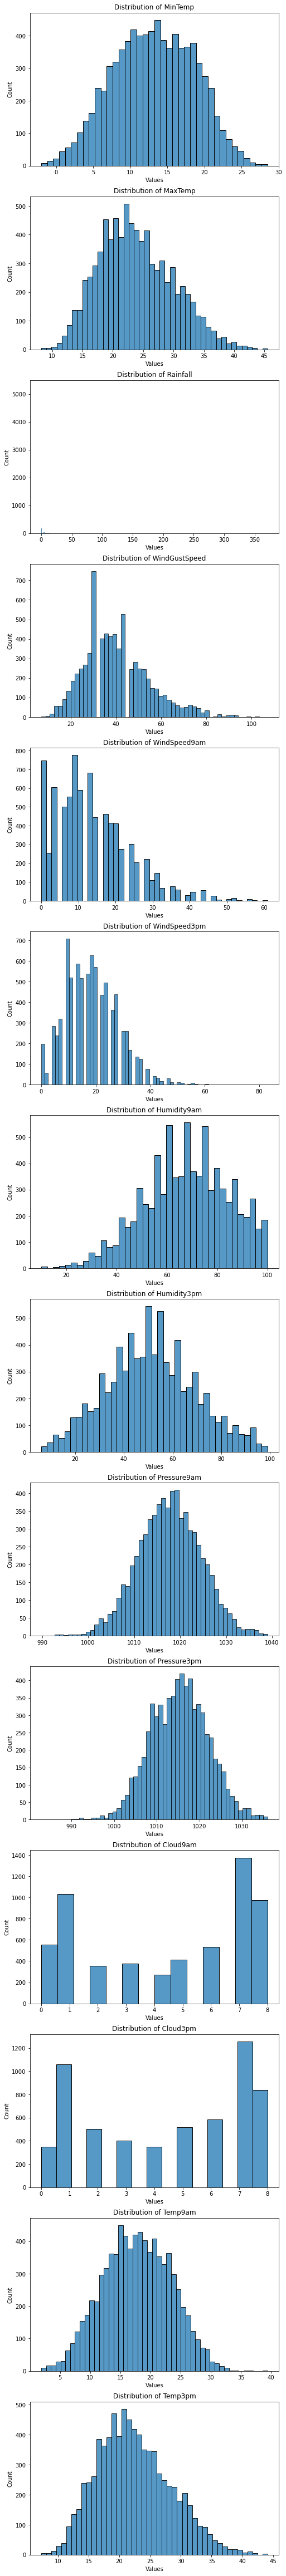

In [35]:
rainfall_float = rainfall.select_dtypes(include='float64')
cols = rainfall_float.columns

fig = plt.figure(figsize = (8, len(cols)* 6))

gs = fig.add_gridspec(len(cols), 1)

ax = [fig.add_subplot(gs[i, 0]) for i in range(len(cols))]

for i in range(len(ax)):
    sns.histplot(x=cols[i], data = rainfall, ax = ax[i])
    
    ax[i].set_xlabel('Values')
    ax[i].set_ylabel('Count')
    ax[i].set_title(f'Distribution of {cols[i]}')

plt.show()

In [36]:
print(len(rainfall[rainfall['Humidity9am'] > 97]))
print(rainfall['Humidity9am'].isnull().sum())

184
44


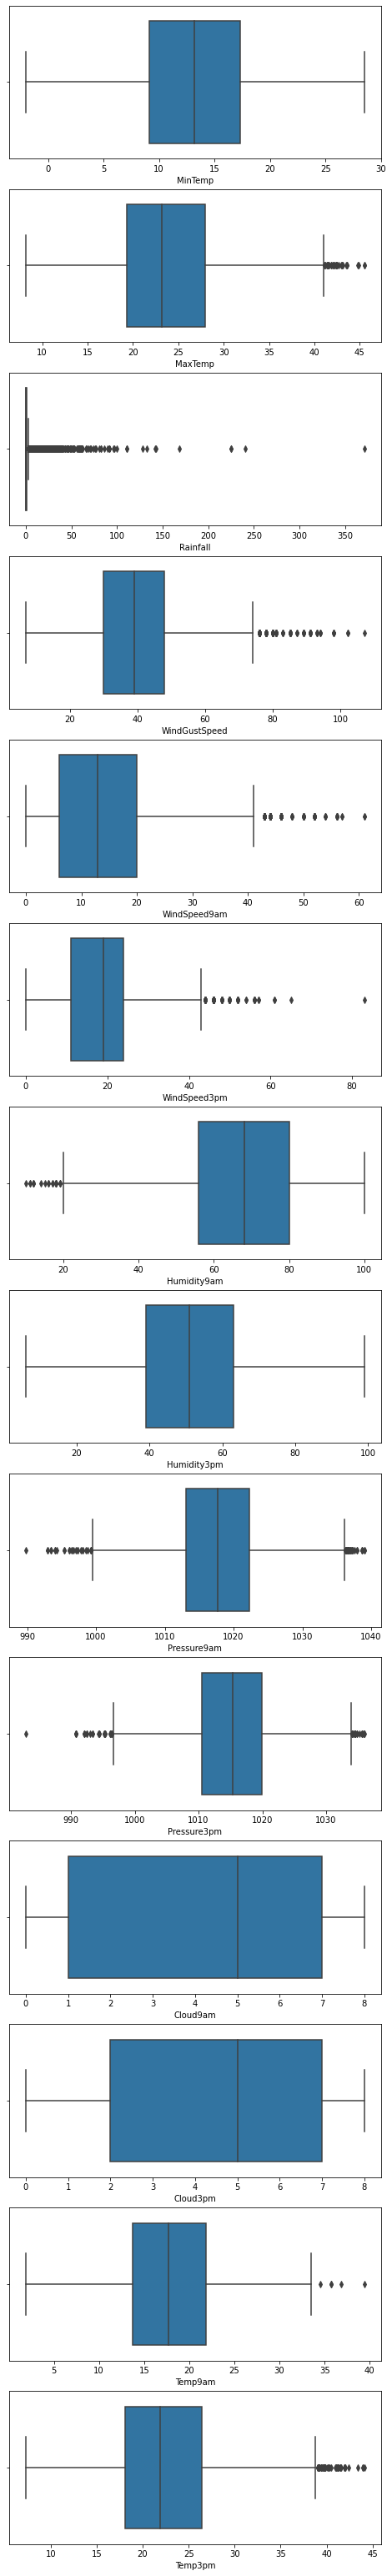

In [37]:
fig = plt.figure(figsize = (8, len(cols)* 4))

gs = fig.add_gridspec(len(cols), 1)

ax = [fig.add_subplot(gs[i, 0]) for i in range(len(cols))]

for i in range(len(ax)):
    sns.boxplot(x=rainfall[cols[i]], ax = ax[i])
    
plt.show()

In [38]:
rainfall = rainfall[rainfall['Rainfall'] < 260]
rainfall = rainfall[rainfall['WindGustSpeed'] <= 100]
rainfall = rainfall[rainfall['WindSpeed3pm'] <= 60]
rainfall = rainfall[rainfall['WindSpeed9am'] <= 80]
rainfall= rainfall[rainfall['Humidity9am'] >= 16]
rainfall = rainfall[rainfall['Pressure9am'] >= 990]
rainfall = rainfall[rainfall['Pressure3pm'] >= 990]

rainfall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6628 entries, 0 to 8423
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6628 non-null   object 
 1   Location       6628 non-null   object 
 2   MinTemp        6624 non-null   float64
 3   MaxTemp        6628 non-null   float64
 4   Rainfall       6628 non-null   float64
 5   WindGustDir    6628 non-null   object 
 6   WindGustSpeed  6628 non-null   float64
 7   WindDir9am     6628 non-null   object 
 8   WindDir3pm     6628 non-null   object 
 9   WindSpeed9am   6628 non-null   float64
 10  WindSpeed3pm   6628 non-null   float64
 11  Humidity9am    6628 non-null   float64
 12  Humidity3pm    6626 non-null   float64
 13  Pressure9am    6628 non-null   float64
 14  Pressure3pm    6628 non-null   float64
 15  Cloud9am       4991 non-null   float64
 16  Cloud3pm       4986 non-null   float64
 17  Temp9am        6628 non-null   float64
 18  Temp3pm 

In [39]:
miss_cols = []
n = len(rainfall)
for c in rainfall_float.columns:
    if rainfall[c].isnull().sum():
        miss_cols.append(c)
        
miss_cols

['MinTemp', 'Humidity3pm', 'Cloud9am', 'Cloud3pm']

In [40]:
len(rainfall['Temp3pm'])

6628

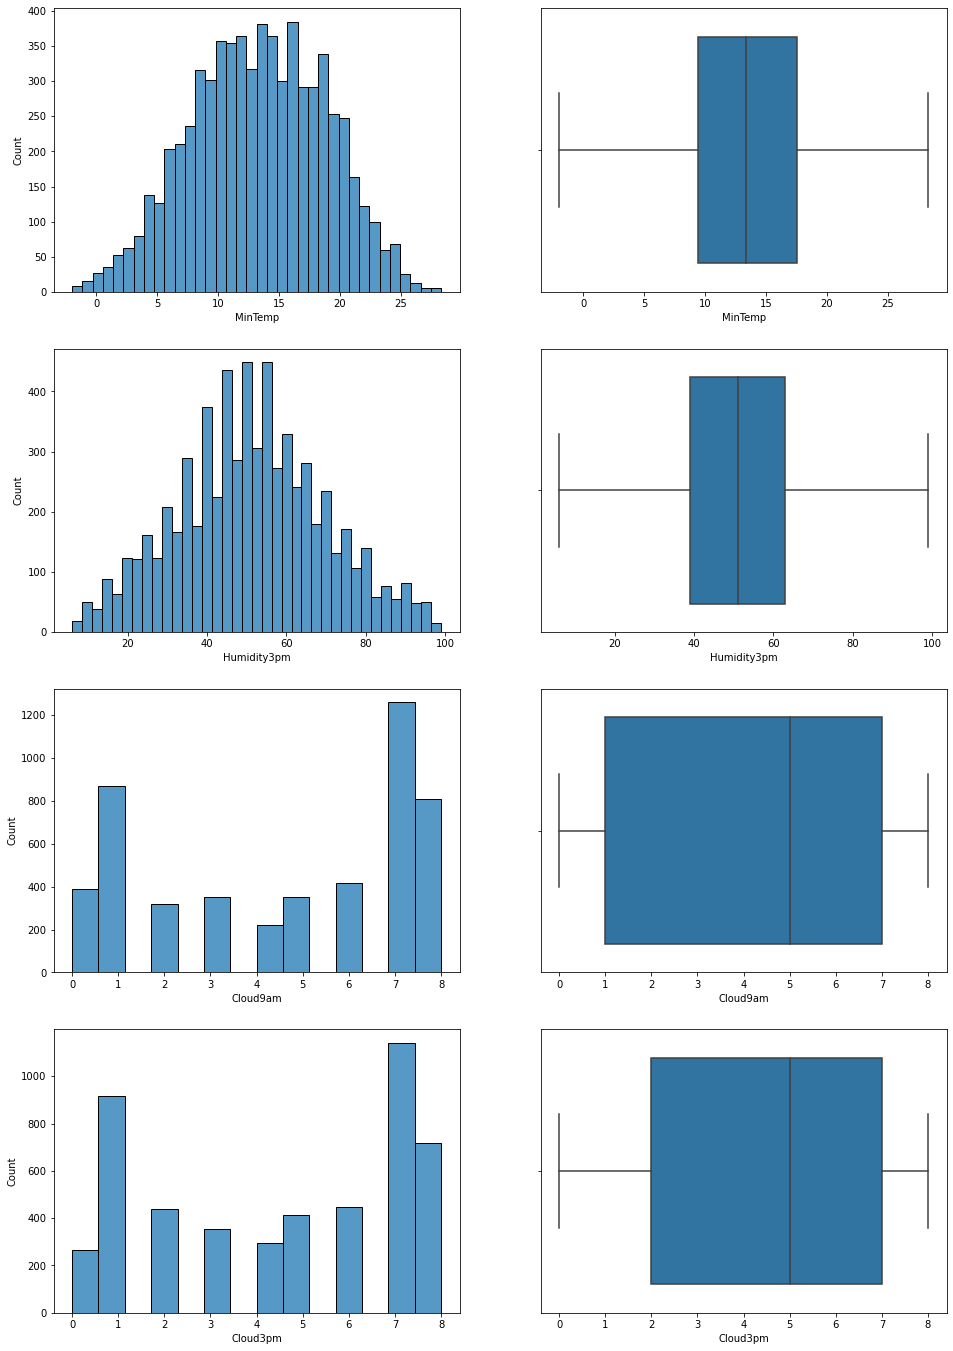

In [42]:
n_row = len(miss_cols)
n_col = 2

fig = plt.figure(figsize = (8*n_col, n_row*6))

gs = fig.add_gridspec(n_row, n_col)

ax = [[fig.add_subplot(gs[i, j]) for j in range(n_col)] for i in range(n_row)]

for i in range(n_row):
    sns.histplot(x=miss_cols[i], data = rainfall, ax = ax[i][0])
    sns.boxplot(x=miss_cols[i], data = rainfall, ax = ax[i][1])

    
plt.show()

In [43]:
rainfall[miss_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6628 entries, 0 to 8423
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MinTemp      6624 non-null   float64
 1   Humidity3pm  6626 non-null   float64
 2   Cloud9am     4991 non-null   float64
 3   Cloud3pm     4986 non-null   float64
dtypes: float64(4)
memory usage: 258.9 KB


In [44]:
rainfall[miss_cols] = rainfall[miss_cols].fillna(rainfall[miss_cols].mean())

rainfall[miss_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6628 entries, 0 to 8423
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MinTemp      6628 non-null   float64
 1   Humidity3pm  6628 non-null   float64
 2   Cloud9am     6628 non-null   float64
 3   Cloud3pm     6628 non-null   float64
dtypes: float64(4)
memory usage: 258.9 KB


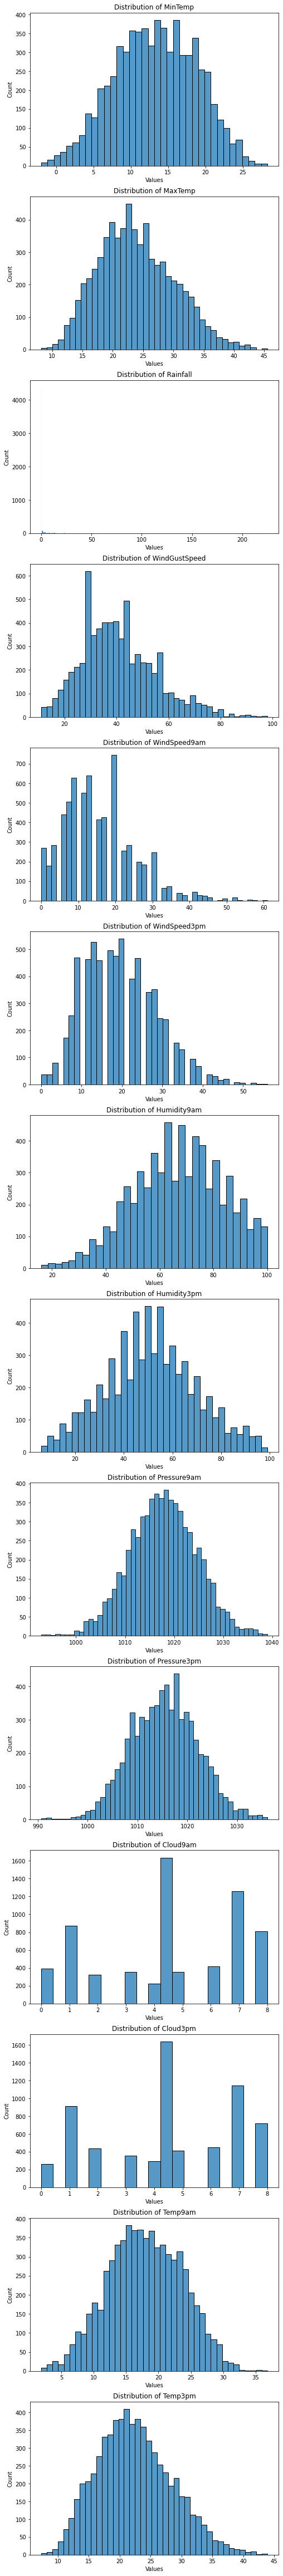

In [45]:
rainfall_float = rainfall.select_dtypes(include='float64')
cols = rainfall_float.columns

fig = plt.figure(figsize = (8, len(cols)* 6))

gs = fig.add_gridspec(len(cols), 1)

ax = [fig.add_subplot(gs[i, 0]) for i in range(len(cols))]

for i in range(len(ax)):
    sns.histplot(x=cols[i], data = rainfall, ax = ax[i])
    
    ax[i].set_xlabel('Values')
    ax[i].set_ylabel('Count')
    ax[i].set_title(f'Distribution of {cols[i]}')
    
plt.show()

In [46]:
len(rainfall[rainfall['WindGustDir'] == 'Null']) 

0

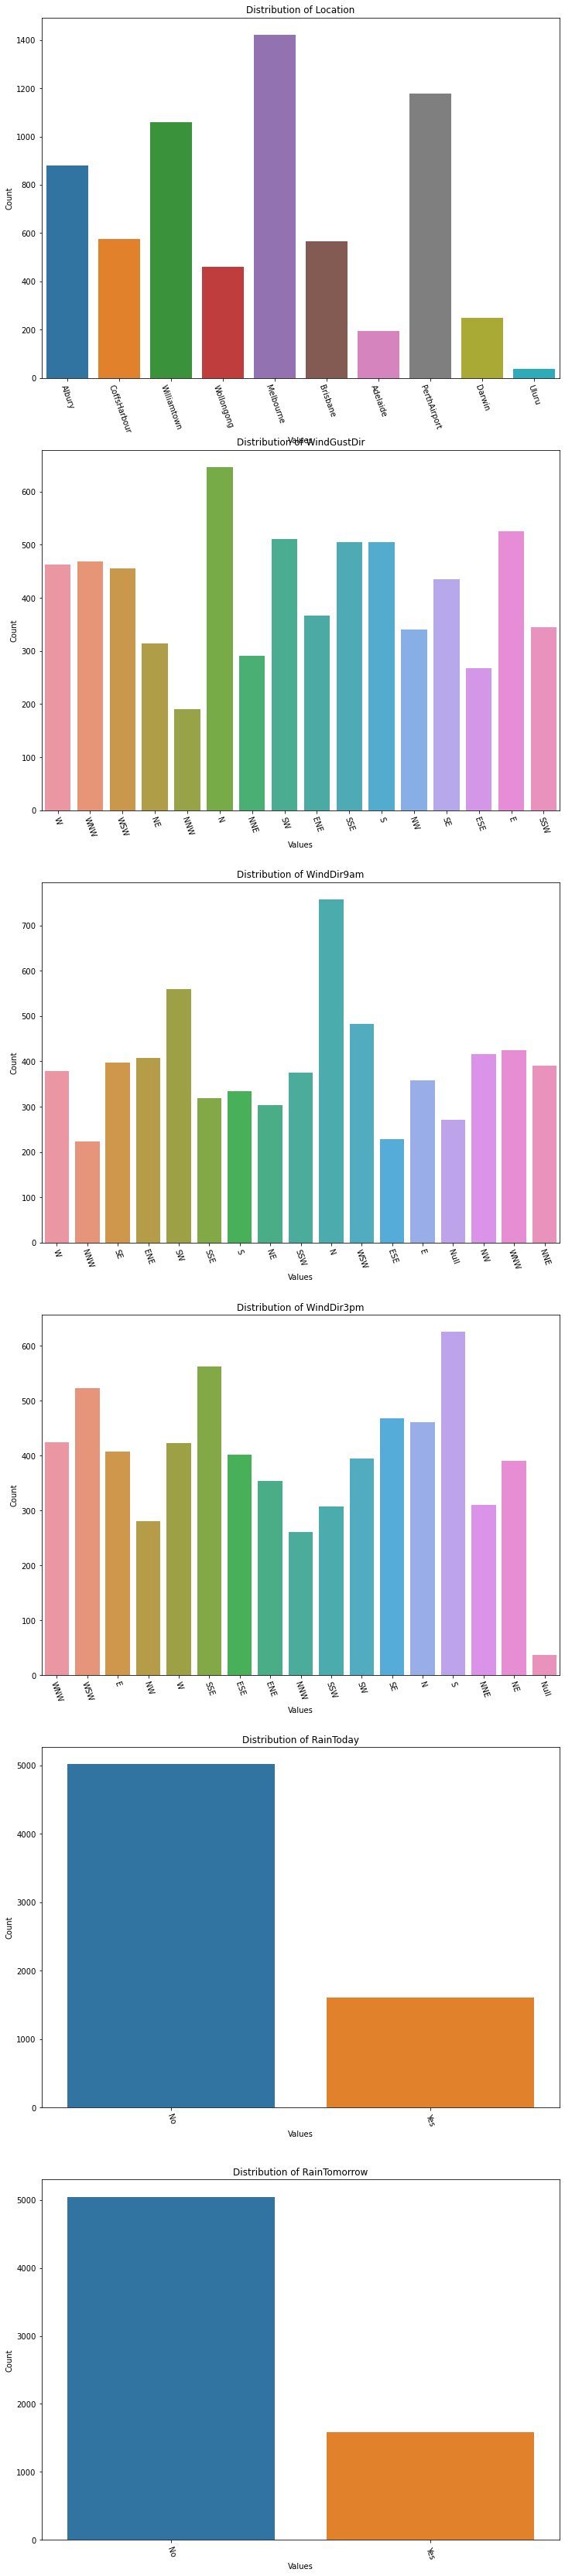

In [47]:
cols = rainfall.select_dtypes(include='object').columns
cols = cols[1:]

fig = plt.figure(figsize = (12, len(cols)* 10))

gs = fig.add_gridspec(len(cols), 1)

ax = [fig.add_subplot(gs[i, 0]) for i in range(len(cols))]

for i in range(len(ax)):
    sns.countplot(x=cols[i], data = rainfall, ax = ax[i])
    ax[i].set_xlabel('Values')
    ax[i].set_ylabel('Count')
    ax[i].set_title(f'Distribution of {cols[i]}')
    ax[i].tick_params(axis='x' , labelrotation=-70)

In [48]:
rainfall.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,6628.0,13.291516,5.460918,-2.0,9.4,13.300000,17.5,28.3
MaxTemp,6628.0,23.878576,6.237512,8.2,19.3,23.300000,28.2,45.5
Rainfall,6628.0,2.729451,9.382499,0.0,0.0,0.000000,1.0,225.0
WindGustSpeed,6628.0,40.525347,14.416799,11.0,30.0,39.000000,50.0,98.0
WindSpeed9am,6628.0,15.207302,9.789417,0.0,7.0,13.000000,20.0,61.0
WindSpeed3pm,6628.0,19.534400,9.059610,0.0,13.0,19.000000,26.0,56.0
Humidity9am,6628.0,66.844900,16.762089,16.0,55.0,67.000000,79.0,100.0
Humidity3pm,6628.0,51.133716,18.476685,6.0,39.0,51.000000,63.0,99.0
Pressure9am,6628.0,1017.771454,6.822693,992.9,1013.2,1017.800000,1022.4,1039.0
Pressure3pm,6628.0,1015.359611,6.738418,990.7,1010.6,1015.400000,1019.9,1036.0


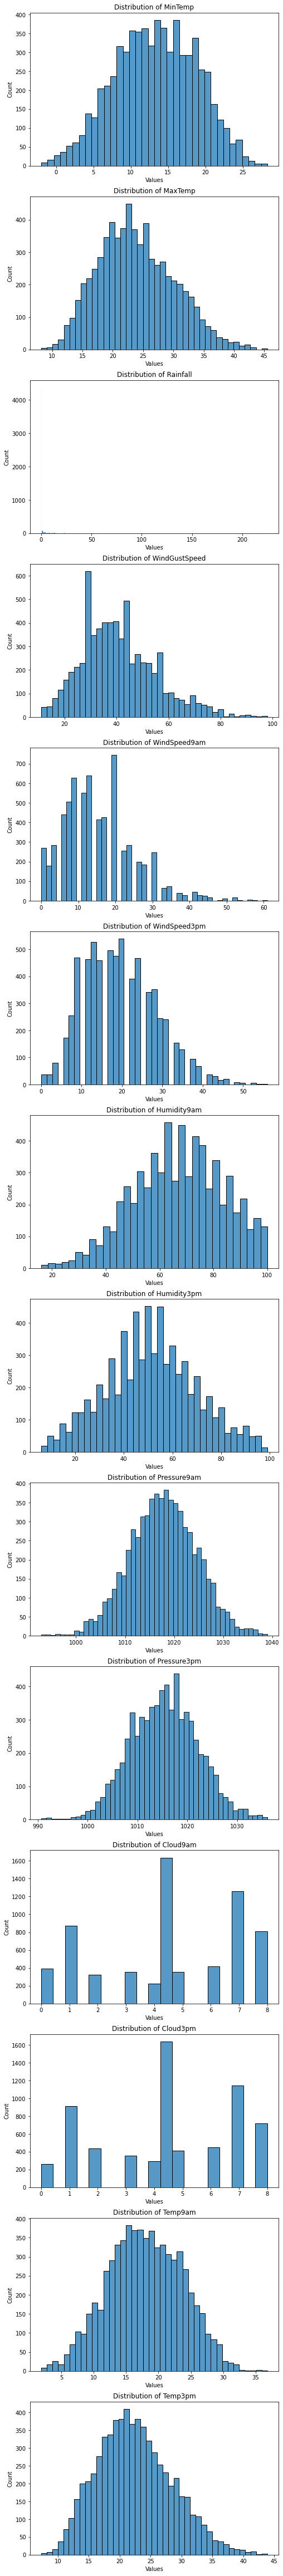

In [49]:
rainfall_float = rainfall.select_dtypes(include='float64')
cols = rainfall_float.columns

fig = plt.figure(figsize = (8, len(cols)*6))
gs = fig.add_gridspec(len(cols), 1)

ax = [fig.add_subplot(gs[i,0]) for i in range(len(cols)) ]

for i in range(len(ax)):
    sns.histplot(x=cols[i], data=rainfall, ax=ax[i])
    ax[i].set_xlabel('Values')
    ax[i].set_ylabel('Count')
    ax[i].set_title(f'Distribution of {cols[i]}')
    
    
plt.show()

<AxesSubplot:>

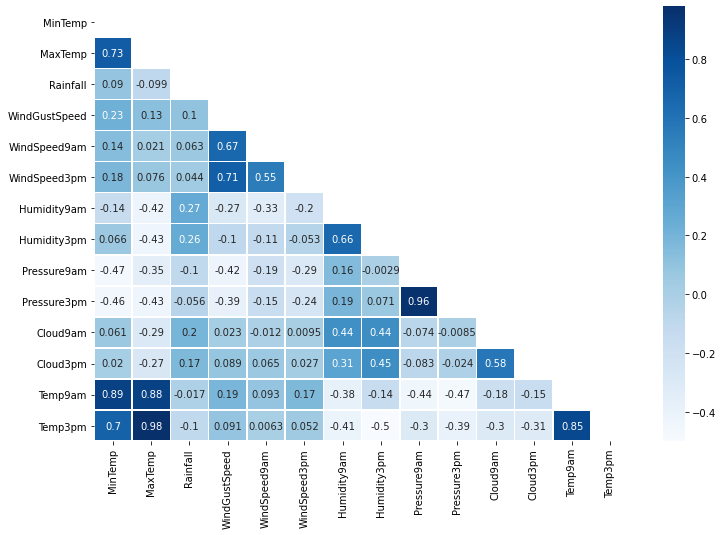

In [51]:
fig, ax = plt.subplots(figsize=(12,8))
mask = np.triu(np.ones_like(rainfall.corr(), dtype=np.bool))
sns.heatmap(rainfall.corr(), annot=True, cmap="Blues", mask=mask, linewidth=0.5)

In [52]:
cols_to_drop = ['Rainfall', 'Temp9am', 'Temp3pm', 'Pressure9am']
rainfall.drop(cols_to_drop, axis=1, inplace=True)

<AxesSubplot:ylabel='RainTomorrow'>

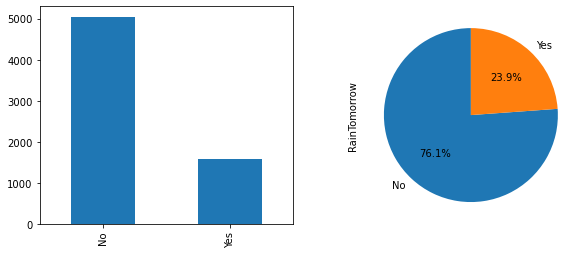

In [53]:
fig, axs = plt.subplots(ncols=2, figsize=(10,4))
rainfall['RainTomorrow'].value_counts().plot(kind='bar', ax=axs[0])
rainfall['RainTomorrow'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=axs[1])

In [54]:
cat_cols=rainfall.select_dtypes(object).columns.tolist()
num_cols=rainfall.select_dtypes(include=np.number).columns.tolist()

In [57]:
le = LabelEncoder()
rainfall[cat_cols] = rainfall[cat_cols].astype('str').apply(le.fit_transform)

In [58]:
mode_values=rainfall[cat_cols].mode()
rainfall[cat_cols] = rainfall[cat_cols].fillna(value=mode_values)


median_values = rainfall[num_cols].median()
rainfall[num_cols] = rainfall[num_cols].fillna(value=median_values)

In [59]:
rainfall.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
RainToday        0
RainTomorrow     0
dtype: int64

In [69]:
y=rainfall['RainTomorrow']
x=rainfall.drop(labels=['RainTomorrow'],axis=1)

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [71]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [72]:
x_train

array([[ 1.6582011 ,  1.23352131, -0.23933473, ...,  0.0086116 ,
         1.47464303, -0.56515223],
       [ 0.29762333, -0.31085636,  0.68241008, ..., -1.05481004,
         0.21203583, -0.56515223],
       [ 0.04176541,  0.07523806,  0.55336581, ...,  1.39105973,
         1.47464303, -0.56515223],
       ...,
       [ 1.63687961,  1.23352131, -0.31307431, ...,  0.0086116 ,
         0.00784765, -0.56515223],
       [ 1.89407012,  1.23352131,  1.51198041, ...,  1.39105973,
         1.05377396,  1.76943476],
       [ 2.06064429,  1.23352131, -0.44211859, ...,  1.39105973,
         1.47464303,  1.76943476]])

In [73]:
x_test

array([[-0.16611915,  0.07523806,  0.1109283 , ...,  0.98341477,
         1.05377396, -0.56515223],
       [-0.40598594, -1.0830452 ,  1.86224344, ...,  0.57576981,
         1.05377396,  1.76943476],
       [-1.12425374, -0.69695078, -1.78786601, ..., -1.87009997,
        -1.47144043, -0.56515223],
       ...,
       [-0.58721864, -0.69695078,  0.92206373, ..., -1.462455  ,
        -0.20883323,  1.76943476],
       [ 1.94870645,  1.23352131,  1.45667572, ...,  1.39105973,
         1.47464303,  1.76943476],
       [ 1.86875085,  1.23352131,  0.66397519, ...,  0.0086116 ,
         0.00784765, -0.56515223]])

In [74]:
y_train

3053    0
8282    0
6138    0
5616    0
1331    0
       ..
6690    0
4815    0
3037    0
4144    0
4274    1
Name: RainTomorrow, Length: 4639, dtype: int32

In [75]:
y_test

5171    1
6148    1
1048    0
3805    0
7873    1
       ..
6166    1
225     1
1451    0
4188    1
4121    0
Name: RainTomorrow, Length: 1989, dtype: int32

In [76]:
x_train.shape

(4639, 16)

In [77]:
x_test.shape

(1989, 16)

In [78]:
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [84]:
model2 = RidgeClassifier(alpha = 10, random_state= 10)

In [91]:
clf_random_forest=RandomForestClassifier()
clf_random_forest=clf_random_forest.fit(x_train,y_train)
random_forest_predictions=clf_random_forest.predict(x_test)

accuracy_random_forest=accuracy_score(y_test,random_forest_predictions)*100
print(accuracy_random_forest)

88.83861236802413


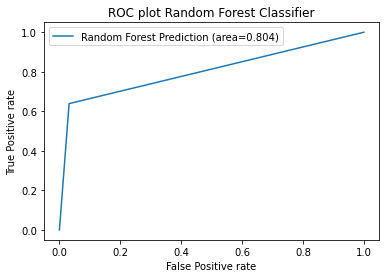

In [94]:
r_fpr,r_tpr,_=roc_curve(y_test,random_forest_predictions)
r_auc=roc_auc_score(y_test,random_forest_predictions)
plt.plot(r_fpr,r_tpr,label='Random Forest Prediction (area={:.3f})'.format(r_auc))
plt.title('ROC plot Random Forest Classifier')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()